<a href="https://colab.research.google.com/github/Rakin96/my_projects_01/blob/main/Project_on_csv_04_and_AutoViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autoviz
import tensorflow as tf
import seaborn as sns
import google.colab
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded=files.upload()


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
data=pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Shape of your Data Set: (299, 13)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Nothing to add Plot not being added
Nothing to add Plot not being added
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 2.167


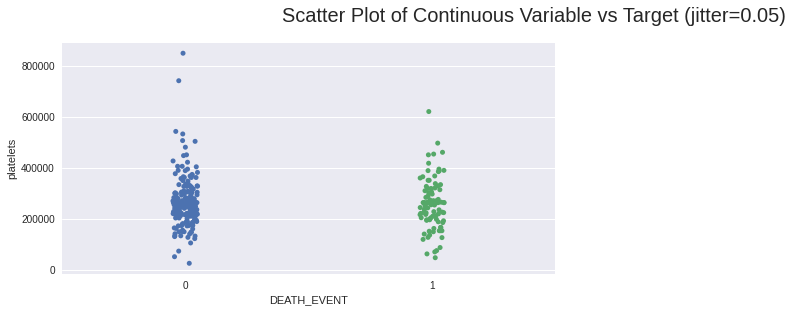

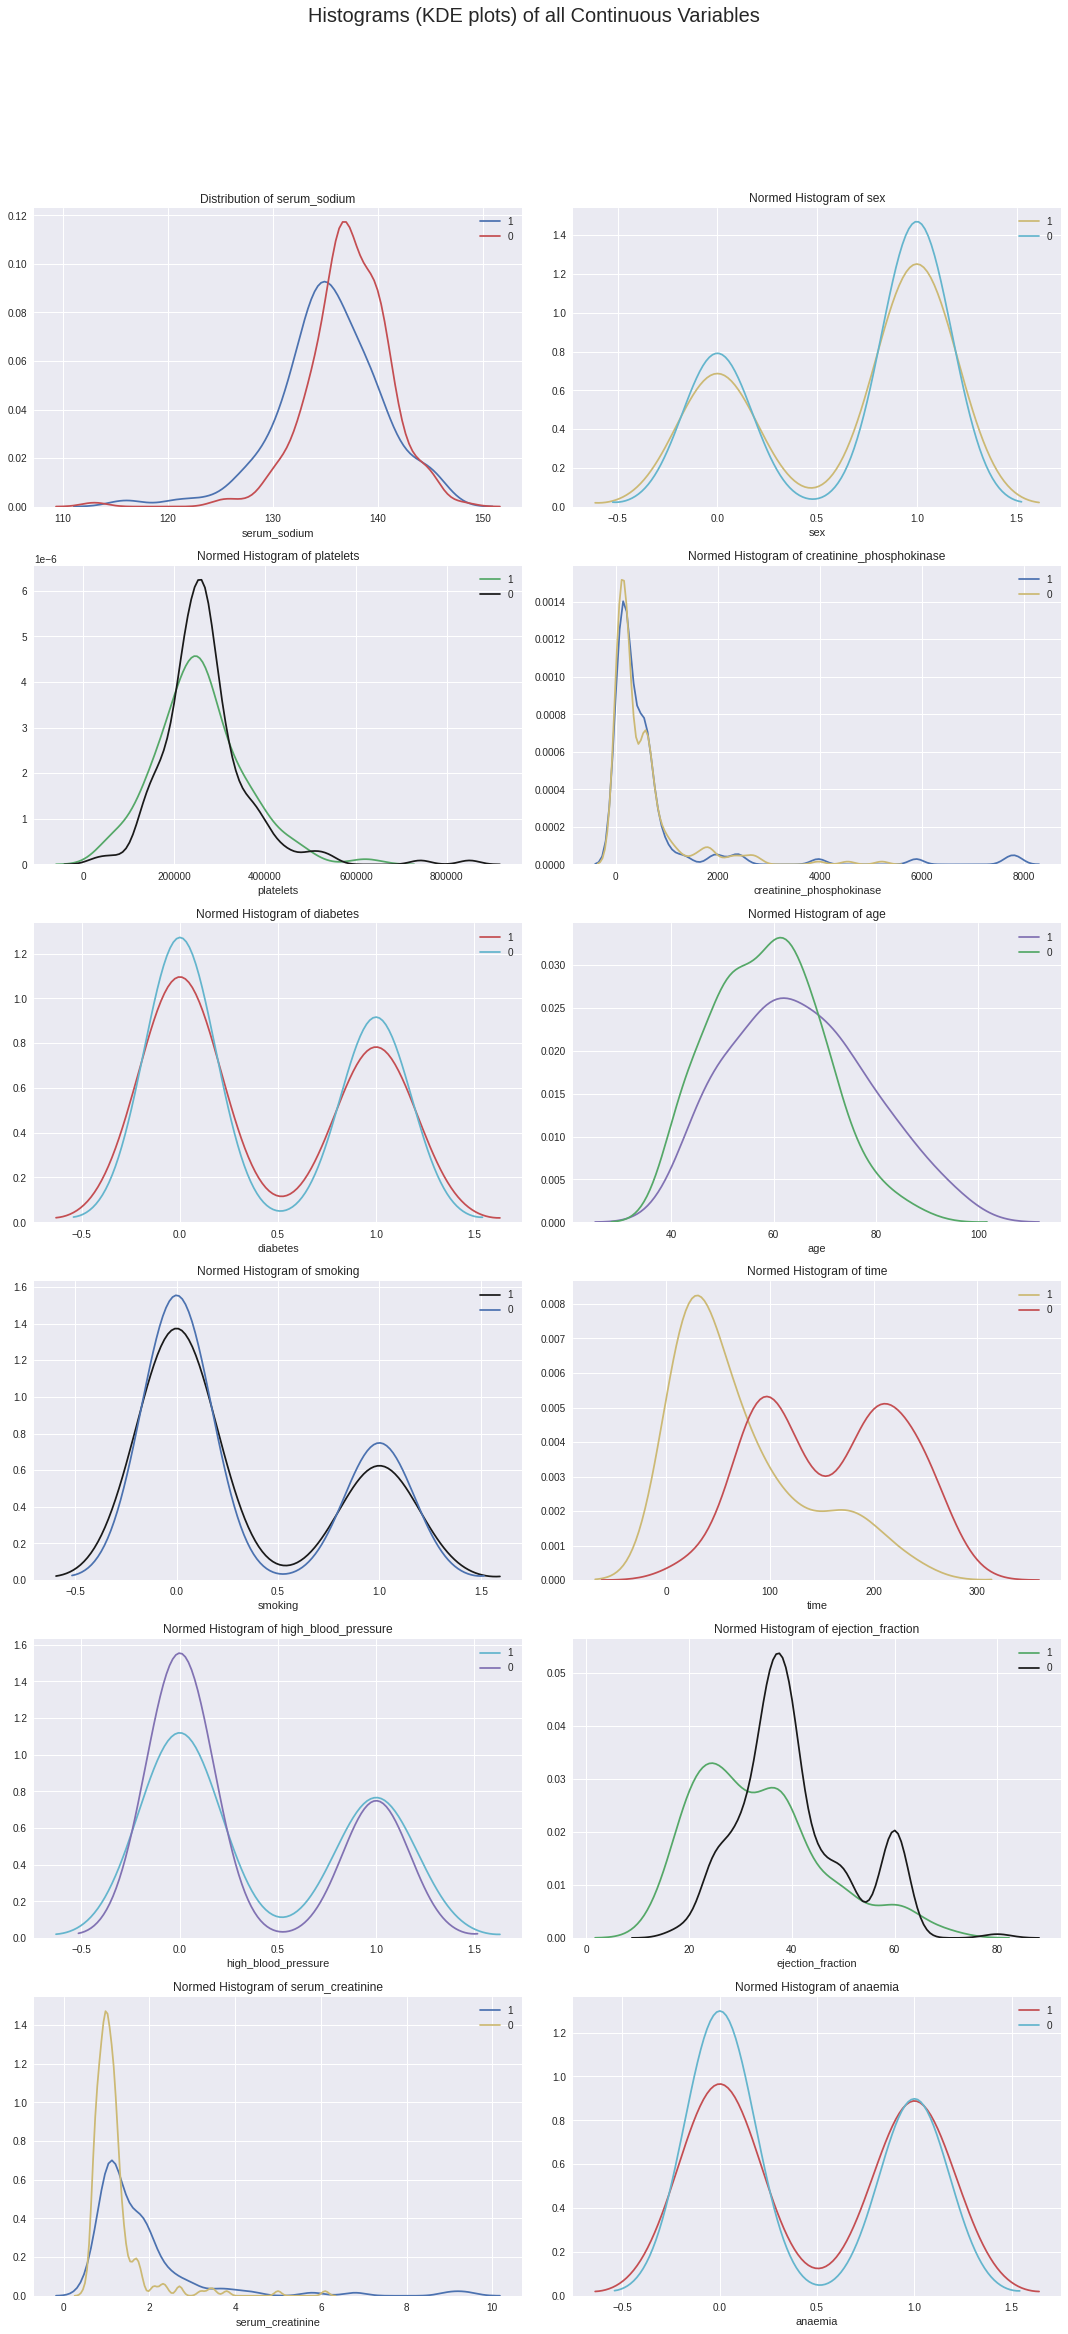

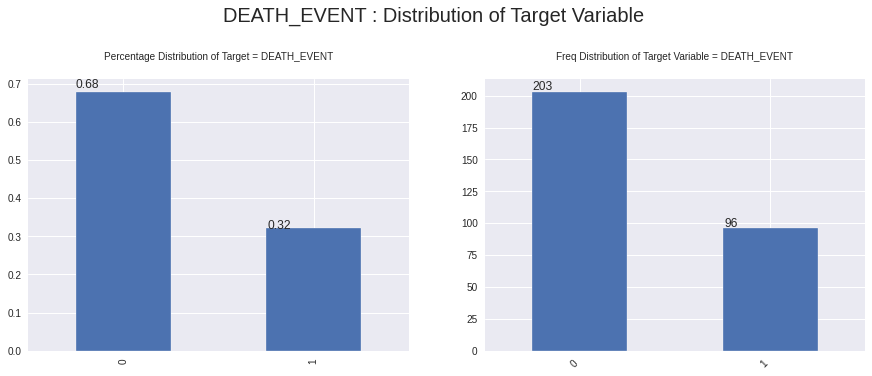

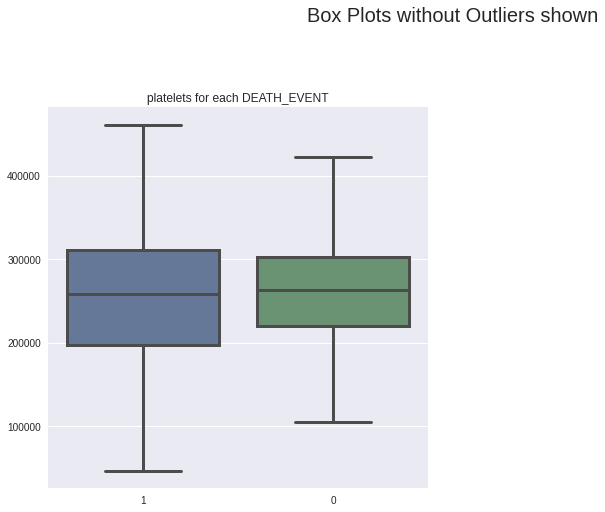

In [ ]:
AV = AutoViz_Class()
df = AV.AutoViz(filename="",sep=',', depVar='DEATH_EVENT', dfte=data, header=0, verbose=2, 
                 lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

In [ ]:
df=data.to_numpy()
X=df[:,:12]
Y=df[:,12].reshape(299,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)#splitting
from sklearn import metrics

In [ ]:
#USING RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

y=range(100,1200,100)
for i in y:
  clas=RandomForestClassifier(n_estimators=i)
  clas.fit(X_train, y_train)
  y_tr=clas.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, y_tr))



Accuracy: 0.8666666666666667
Accuracy: 0.8777777777777778
Accuracy: 0.8666666666666667
Accuracy: 0.8555555555555555
Accuracy: 0.8777777777777778
Accuracy: 0.8555555555555555
Accuracy: 0.8555555555555555
Accuracy: 0.8777777777777778
Accuracy: 0.8666666666666667
Accuracy: 0.8666666666666667
Accuracy: 0.8666666666666667


In [ ]:
#using Deep Neural Network
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(8,input_dim=12,activation='relu'),
                           tf.keras.layers.Dense(12,activation='relu'),
                           tf.keras.layers.Dense(12,activation='relu'),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(512,activation='relu'),
                           tf.keras.layers.Dense(512,activation='relu'),
                           tf.keras.layers.Dense(64,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid'),
                           ])
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

mymod=model.fit(X_train,y_train,epochs=500,batch_size=20,validation_data=(X_test,y_test))
model.summary()

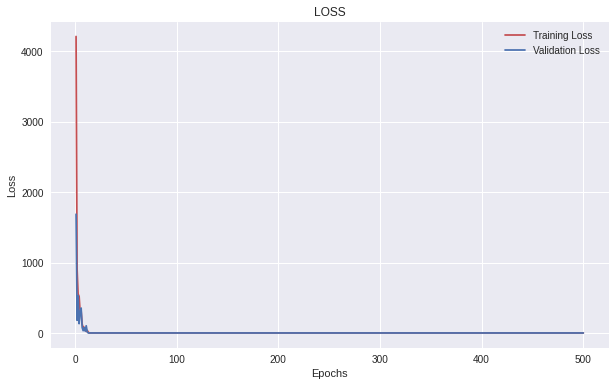

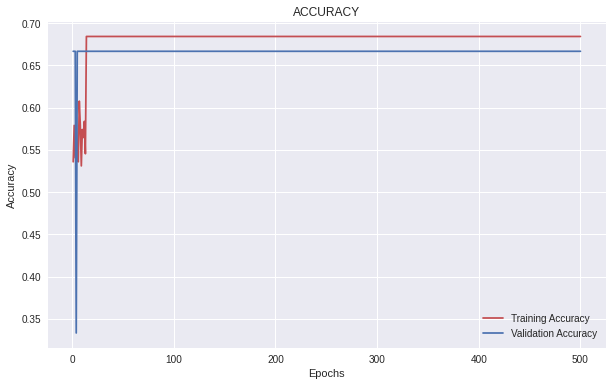

In [ ]:
tr_loss=mymod.history['loss']
val_loss=mymod.history['val_loss']
epochs=range(1,501)
plt.figure(figsize=(10,6))
plt.plot(epochs,tr_loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show(100,60)
plt.figure(figsize=(10,6))
tr_ac=mymod.history['accuracy']
val_ac=mymod.history['val_accuracy']
plt.plot(epochs,tr_ac,'r',label='Training Accuracy')
plt.plot(epochs,val_ac,'b',label='Validation Accuracy')
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Using XGBoost Algorithm
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
xgb=XGBClassifier(n_estimators = 500,gamma=0.3,learning_rate=0.01)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)#splitting
xgb.fit(X_train,y_train)
#xgb_cv = XGBClassifier(n_estimators=100)
#scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
#print("Scores:", scores)
#print("Mean:", scores.mean())
#print("Standard Deviation:", scores.std())

preds = xgb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.7777777777777778
